In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('cleaned_data.csv')
df['LIMIT_BAL'].shape


(26664,)

In [4]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape

(19998, 1)


*Here we can also use Standard Scaler for scaling the LIMIT_BAL*


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [28]:
y_pred_proba = lr.predict_proba(X_test)

prob_sum = np.sum(y_pred_proba,1)


np.unique(prob_sum)
pos_proba = y_pred_proba[:,1]
print(pos_proba)
print("")
prob_sum

[0.0719346  0.11043995 0.41666168 ... 0.40040178 0.41666168 0.20652984]



array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
y_pred_proba.shape

prob_sum.shape


(6666,)

Text(0, 0.5, 'Number of samples')

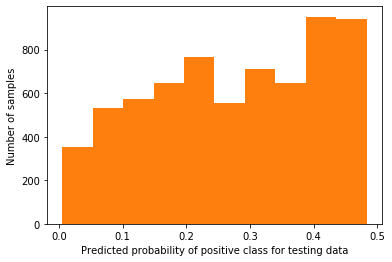

In [8]:
plt.hist(pos_proba)
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

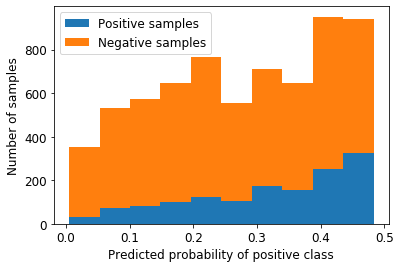

In [9]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [10]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
metrics.roc_auc_score(y_test, pos_proba)

0.6212291762577219

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

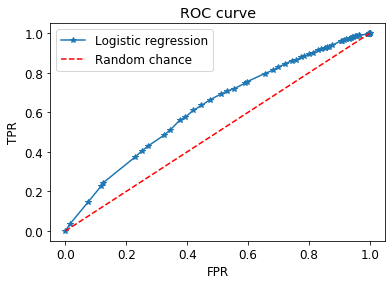

In [11]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [12]:
thresholds

array([1.48318171, 0.48318171, 0.46640143, 0.44969684, 0.43310493,
       0.41666168, 0.40040178, 0.38435832, 0.36856256, 0.35304369,
       0.33782866, 0.32294203, 0.30840587, 0.29423965, 0.28046026,
       0.26708197, 0.25411646, 0.24157291, 0.22945805, 0.21777629,
       0.20652984, 0.19571887, 0.18534163, 0.1753946 , 0.16587273,
       0.1567695 , 0.14807718, 0.13978692, 0.13188895, 0.12437269,
       0.11722693, 0.11043995, 0.10399962, 0.09928102, 0.09789352,
       0.09210908, 0.08663361, 0.08145443, 0.07655892, 0.0719346 ,
       0.06756915, 0.06345052, 0.05956689, 0.05590679, 0.05245903,
       0.04921281, 0.04615769, 0.0432836 , 0.04058085, 0.03804015,
       0.03565262, 0.03340973, 0.03130336, 0.02932576, 0.02572772,
       0.0240936 , 0.01977592, 0.01851266, 0.01732866, 0.01621913,
       0.01517955, 0.01420564, 0.01329337, 0.01088954, 0.01018803,
       0.00729826, 0.0068265 , 0.00597196, 0.00522383])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [13]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,pos_proba)


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'PRC curve')

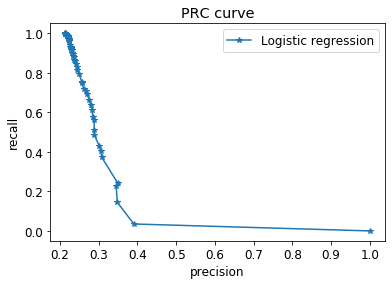

In [14]:
plt.plot(precision, recall, '*-')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('PRC curve')

In [15]:
precision

array([0.21404983, 0.21396396, 0.2139961 , 0.21402824, 0.21391017,
       0.21394231, 0.21400661, 0.21392063, 0.21398496, 0.21408154,
       0.21402769, 0.21409214, 0.21412438, 0.21415663, 0.21425343,
       0.21431801, 0.21429649, 0.21436114, 0.21811717, 0.21836766,
       0.21887144, 0.21927636, 0.21990922, 0.22026432, 0.22052092,
       0.22065579, 0.22117984, 0.22124741, 0.22249035, 0.22339219,
       0.22379788, 0.22420278, 0.22582278, 0.22627364, 0.22733516,
       0.22821577, 0.22808231, 0.22935619, 0.23100035, 0.23199133,
       0.23296181, 0.23476803, 0.23569277, 0.23695318, 0.23971133,
       0.24152457, 0.24396285, 0.24482467, 0.24868536, 0.2560019 ,
       0.25632378, 0.2614129 , 0.26578947, 0.26928318, 0.27559055,
       0.27871882, 0.28333877, 0.28447378, 0.28850325, 0.28785489,
       0.28900042, 0.3007335 , 0.3047619 , 0.30782609, 0.34879032,
       0.34504792, 0.34797297, 0.390625  , 1.        ])

In [16]:
thresholds

array([0.0068265 , 0.00729826, 0.00891647, 0.01018803, 0.01088954,
       0.01329337, 0.01420564, 0.01517955, 0.01621913, 0.01732866,
       0.01851266, 0.01977592, 0.02256087, 0.0240936 , 0.02572772,
       0.02932576, 0.03130336, 0.03340973, 0.03565262, 0.03804015,
       0.04058085, 0.0432836 , 0.04615769, 0.04921281, 0.05245903,
       0.05590679, 0.05956689, 0.06345052, 0.06756915, 0.0719346 ,
       0.07655892, 0.08145443, 0.08663361, 0.09210908, 0.09789352,
       0.09928102, 0.10399962, 0.11043995, 0.11722693, 0.12437269,
       0.13188895, 0.13978692, 0.14807718, 0.1567695 , 0.16587273,
       0.1753946 , 0.18534163, 0.19571887, 0.20652984, 0.21777629,
       0.22945805, 0.24157291, 0.25411646, 0.26708197, 0.28046026,
       0.29423965, 0.30840587, 0.32294203, 0.33782866, 0.35304369,
       0.36856256, 0.38435832, 0.40040178, 0.41666168, 0.43310493,
       0.44969684, 0.46640143, 0.48318171])

In [17]:
recall


array([1.        , 0.99929874, 0.99929874, 0.99929874, 0.99859748,
       0.99859748, 0.99859748, 0.99789621, 0.99789621, 0.99789621,
       0.99719495, 0.99719495, 0.99719495, 0.99719495, 0.99719495,
       0.99719495, 0.99649369, 0.99649369, 0.98948107, 0.9887798 ,
       0.98737728, 0.98597475, 0.98527349, 0.98176718, 0.97966339,
       0.97685835, 0.97545582, 0.97265077, 0.96984572, 0.96704067,
       0.9628331 , 0.96143058, 0.93828892, 0.9312763 , 0.92847125,
       0.9256662 , 0.92496494, 0.91935484, 0.91654979, 0.90112202,
       0.8941094 , 0.88359046, 0.87798036, 0.86605891, 0.86185133,
       0.84431978, 0.82889201, 0.81276297, 0.79593268, 0.75525947,
       0.74614306, 0.71879383, 0.70827489, 0.69284712, 0.66269285,
       0.63464236, 0.60939691, 0.5743338 , 0.55960729, 0.51192146,
       0.48457223, 0.4312763 , 0.40392707, 0.37237027, 0.24263675,
       0.22720898, 0.14446003, 0.03506311, 0.        ])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
metrics.auc(recall,precision)

0.30801708876277645

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [19]:
ytrain_pred_proba = lr.predict_proba(X_train)
pos_proba1 = ytrain_pred_proba[:,1]
pos_proba1

array([0.30840587, 0.46640143, 0.16587273, ..., 0.16587273, 0.03340973,
       0.25411646])

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pos_proba1)
metrics.roc_auc_score(y_train, pos_proba1)

0.617946366900315

    How is this different, conceptually and quantitatively, from your earlier calculation?
